# The Sparks Foundation

# Data Science and Business Analytics Intern

## Author: Anwesha Datta

# Task 6: Prediction using Decision Tree Algorithm



## Data Source: https://bit.ly/3kXTdox

## Problem Statement 1: Create the Decision Tree classifier and visualize it graphically.
## Problem Statement 2: The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [19]:
import pandas as pd
import sklearn.datasets as datasets

### Import the data

In [35]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.shape

(150, 6)

In [22]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Check for null values

In [23]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Display the species names

In [24]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Put categorical values for the species names

In [36]:
Species_ = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [37]:
df['Species'] = df['Species'].map(Species_)

In [38]:
df.Species.unique()

array([0, 1, 2])

In [41]:
X = df.iloc[:, 1:5].values
Y = df.iloc[:, 5].values

### Split the data into training set and testing set

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Build the decision tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

### Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]])

In [54]:
from sklearn import metrics
print(f"Precision: {metrics.precision_score(y_test, y_predict, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_predict, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_predict, average = 'macro')}")

Precision: 0.9569444444444445
Recall: 0.9569444444444445
F1 Score: 0.9569444444444445


### Visualizing the Decision Tree

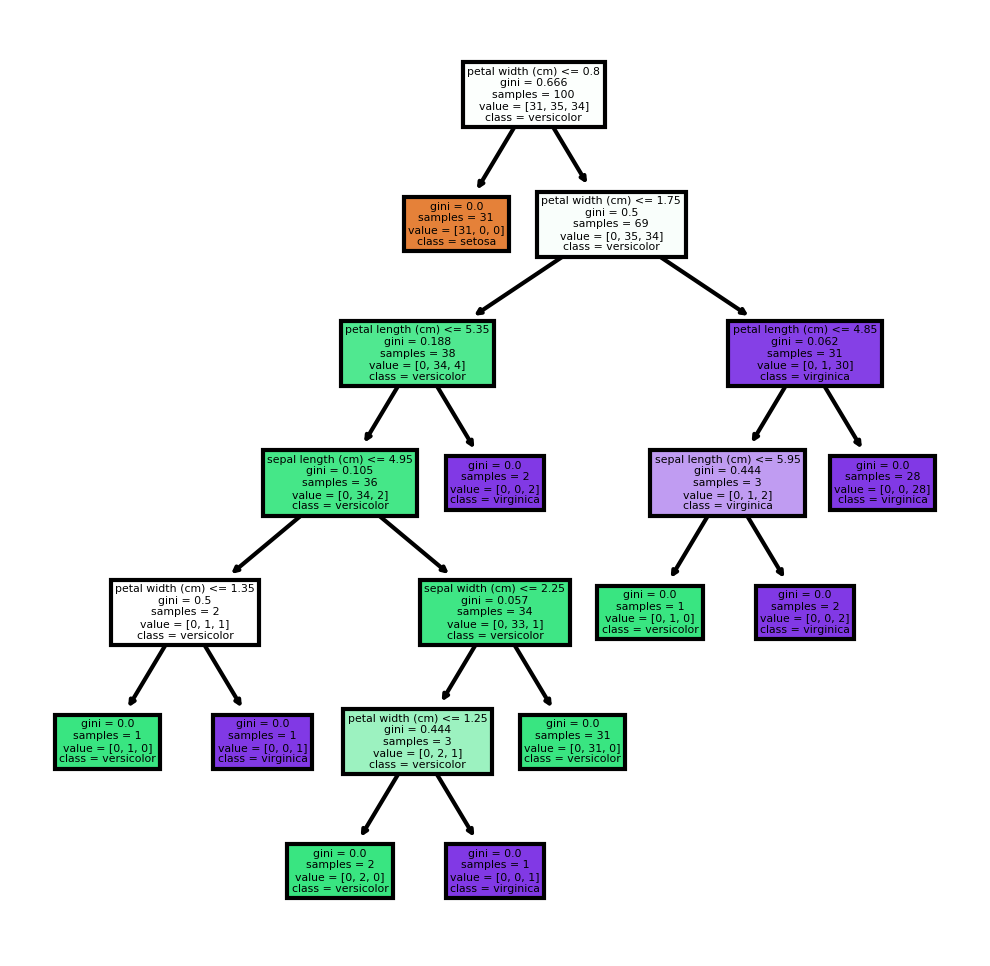

In [49]:
from sklearn import tree
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);